In [8]:
from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json
import pandas as pd
import os 
from time import time
from time import sleep
import seaborn as sns
import matplotlib.pyplot as plt

In [14]:
url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest' 
#Original Sandbox Environment: 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
parameters = {
  'start':'1',
  'limit':'15',
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': '',
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)


In [10]:
#This allows to see all the columns
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [16]:
#This normalizes the data and makes it all pretty in a dataframe

df = pd.json_normalize(data['data'])
df['timestamp'] = pd.to_datetime('now')

In [26]:
def api_runner():
    global df
    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest' 
    #Original Sandbox Environment: 'https://sandbox-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    parameters = {
      'start':'1',
      'limit':'15',
      'convert':'USD'
    }
    headers = {
      'Accepts': 'application/json',
      'X-CMC_PRO_API_KEY': '9f64da6c-d59a-4dcb-a58c-8635c6423580',
    }

    session = Session()
    session.headers.update(headers)

    try:
      response = session.get(url, params=parameters)
      data = json.loads(response.text)
      #print(data)
    except (ConnectionError, Timeout, TooManyRedirects) as e:
      print(e)
    
    # keep it in a dataframe
    df2 = pd.json_normalize(data.get('data', []))
    df2['Timestamp'] = pd.to_datetime('now')
    df_append = pd.DataFrame(df2)
    df = pd.concat([df2,df_append])


    # create a csv and append data to it
    df = pd.json_normalize(data['data'])
    df['timestamp'] = pd.to_datetime('now')
    df

    if not os.path.isfile(r'C:\Users\iswen\Desktop\Python Stud\API.csv'):
        df.to_csv(r'C:\Users\iswen\Desktop\Python Stud\API.csv', header='column_names')
    else:
        df.to_csv(r'C:\Users\iswen\Desktop\Python Stud\API.csv', mode='a', header=False)


In [28]:
for i in range(10):
    api_runner()
    print('API Runner completed')
    sleep(5) #sleep for 1 minute
exit()

API Runner completed
API Runner completed
API Runner completed


KeyboardInterrupt: 

In [38]:
pd.set_option('display.float_format', lambda x: '%.5f' % x)
df = pd.read_csv(r'C:\Users\iswen\Desktop\Python Stud\API.csv')
df

,Unnamed: 0,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,0,1,Bitcoin,BTC,bitcoin,11642,2010-07-13T00:00:00.000Z,"['mineable', 'pow', 'sha-256', 'store-of-value...",21000000.00000,19742925.00000,19742925.00000,False,NaN,1,NaN,NaN,NaN,2024-08-21T09:44:00.000Z,59225.88177,27264808000.53993,-7.97050,-0.59045,-2.74394,-2.72578,-12.03799,-7.80195,-14.96841,1169292141920.44629,55.81360,1243743517251.34009,NaN,2024-08-21T09:44:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-08-21 12:48:18.660208
1,1,1027,Ethereum,ETH,ethereum,9236,2015-08-07T00:00:00.000Z,"['pos', 'smart-contracts', 'ethereum-ecosystem...",NaN,120291369.66511,120291369.66511,True,NaN,2,NaN,NaN,NaN,2024-08-21T09:43:00.000Z,2577.20668,12085703010.34971,-6.88780,-0.64743,-3.18822,-5.43515,-26.02084,-26.07014,-32.45405,310015722032.43903,14.79450,310015722032.44000,NaN,2024-08-21T09:43:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-08-21 12:48:18.660208
2,2,825,Tether USDt,USDT,tether,94963,2015-02-25T00:00:00.000Z,"['stablecoin', 'asset-backed-stablecoin', 'ava...",NaN,117294453952.96539,120258419915.70276,True,NaN,3,NaN,NaN,NaN,2024-08-21T09:43:00.000Z,1.00011,48382697787.32697,-4.78650,-0.03173,-0.02635,-0.01918,0.00737,0.06531,0.03456,117307547171.91991,5.60050,120271843993.06000,NaN,2024-08-21T09:43:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-08-21 12:48:18.660208
3,3,1839,BNB,BNB,bnb,2214,2017-07-25T00:00:00.000Z,"['marketplace', 'centralized-exchange', 'payme...",NaN,145935920.94824,145935920.94824,False,NaN,4,NaN,NaN,NaN,2024-08-21T09:43:00.000Z,555.36052,2041463465.58857,10.34150,-0.20104,-2.27310,5.28199,-6.51064,-5.26687,-9.37155,81047049002.00255,3.86890,81047049002.00000,NaN,2024-08-21T09:43:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-08-21 12:48:18.660208
4,4,5426,Solana,SOL,solana,721,2020-04-10T00:00:00.000Z,"['pos', 'platform', 'solana-ecosystem', 'cms-h...",NaN,466430872.40588,582728603.07219,True,NaN,5,NaN,NaN,NaN,2024-08-21T09:43:00.000Z,141.47103,1667414664.39830,-28.51300,-0.65328,-3.47497,-3.32629,-20.78794,5.44064,-19.95961,65986455981.12637,3.15030,82439215734.64000,NaN,2024-08-21T09:43:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-08-21 12:48:18.660208
5,5,3408,USDC,USDC,usd-coin,21589,2018-10-08T00:00:00.000Z,"['medium-of-exchange', 'stablecoin', 'asset-ba...",NaN,34815159189.87573,34815159189.87573,False,NaN,6,NaN,NaN,NaN,2024-08-21T09:43:00.000Z,0.99990,4867797871.27518,-7.47830,-0.01003,-0.00417,-0.00536,-0.01120,-0.00991,-0.02485,34811523446.32486,1.66180,34811523446.32000,NaN,2024-08-21T09:43:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2024-08-21 12:48:18.660208
6,6,52,XRP,XRP,xrp,1369,2013-08-04T00:00:00.000Z,"['medium-of-exchange', 'enterprise-solutions',...",100000000000.00000,56113081096.00000,99987342059.00000,False,NaN,7,NaN,NaN,NaN,2024-08-21T09:44:00.000Z,0.59636,1131067559.73570,-31.34820,-0.29209,-2.21692,3.35182,-0.94839,23.06614,13.12648,33463398927.85937,1.59760,59635646936.96000,NaN,2024-08-21T09:44:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-08-21 12:48:18.660208
7,7,11419,Toncoin,TON,toncoin,518,2021-08-26T13:40:22.000Z,"['pos', 'layer-1', 'ftx-bankruptcy-estate', 'd...",NaN,2525486406.03743,5110812107.97771,True,NaN,8,3414166606.00000,22723107291.30812,NaN,2024-08-21T09:43:00.000Z,6.65554,227581685.59441,-27.53080,-0.12054,-2.91038,-5.38113,-5.85540,-7.47307,2.93004,16808464609.27765,0.80230,34015

In [40]:
df3 = df.groupby('name', sort=False)[['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d']].mean()
df3

,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d
name,,,,,,
Bitcoin,0.10385,-2.03798,-2.95382,-11.91199,-7.55835,-15.02024
Ethereum,-0.09785,-2.65021,-5.94809,-26.08340,-26.05593,-33.17724
Tether USDt,-0.00051,-0.03658,-0.04127,0.00368,0.07450,0.05950
BNB,0.16164,-2.11651,4.92892,-6.92231,-5.24937,-9.02181
Solana,0.02297,-3.02833,-4.01574,-21.26545,5.77035,-19.23422
USDC,-0.00526,-0.00781,-0.02953,-0.01271,-0.00819,-0.01436
XRP,-0.11600,-1.80700,3.25475,-1.64303,23.19289,13.43858
Toncoin,0.48651,-1.79567,-5.45613,-4.67640,-6.15153,3.90038
Dogecoin,-0.08453,-1.18317,-1.74539,-24.63713,-16.36508,-37.79417


In [42]:
df4 = df3.stack()
df4

name                                      
Bitcoin       quote.USD.percent_change_1h      0.10385
              quote.USD.percent_change_24h    -2.03798
              quote.USD.percent_change_7d     -2.95382
              quote.USD.percent_change_30d   -11.91199
              quote.USD.percent_change_60d    -7.55835
              quote.USD.percent_change_90d   -15.02024
Ethereum      quote.USD.percent_change_1h     -0.09785
              quote.USD.percent_change_24h    -2.65021
              quote.USD.percent_change_7d     -5.94809
              quote.USD.percent_change_30d   -26.08340
              quote.USD.percent_change_60d   -26.05593
              quote.USD.percent_change_90d   -33.17724
Tether USDt   quote.USD.percent_change_1h     -0.00051
              quote.USD.percent_change_24h    -0.03658
              quote.USD.percent_change_7d     -0.04127
              quote.USD.percent_change_30d     0.00368
              quote.USD.percent_change_60d     0.07450
              quote.US

In [44]:
df5 = df4.to_frame(name='values')
df5

values
name                                               
Bitcoin      quote.USD.percent_change_1h    0.10385
             quote.USD.percent_change_24h  -2.03798
             quote.USD.percent_change_7d   -2.95382
             quote.USD.percent_change_30d -11.91199
             quote.USD.percent_change_60d  -7.55835
             quote.USD.percent_change_90d -15.02024
Ethereum     quote.USD.percent_change_1h   -0.09785
             quote.USD.percent_change_24h  -2.65021
             quote.USD.percent_change_7d   -5.94809
             quote.USD.percent_change_30d -26.08340
             quote.USD.percent_change_60d -26.05593
             quote.USD.percent_change_90d -33.17724
Tether USDt  quote.USD.percent_change_1h   -0.00051
             quote.USD.percent_change_24h  -0.03658
             quote.USD.percent_change_7d   -0.04127
             quote.USD.percent_change_30d   0.00368
             quote.USD.percent_change_60d   0.07450
             quote.USD.percent_change_90d   0.05950
BNB          quote.USD.percent_change_1h    0.16164
             quote.USD.percent_change_24h  -2.11651
             quote.USD.percent_change_7d    4.92892
             quote.USD.percent_change_30d  -6.92231
             quote.USD.percent_change_60d  -5.24937
             quote.USD.percent_change_90d  -9.02181
Solana       quote.USD.percent_change_1h    0.02297
             quote.USD.percent_change_24h  -3.02833
             quote.USD.percent_change_7d   -4.01574
             quote.USD.percent_change_30d -21.26545
             quote.USD.percent_change_60d   5.77035
             quote.USD.percent_change_90d -19.23422
USDC         quote.USD.percent_change_1h   -0.00526
             quote.USD.percent_change_24h  -0.00781
             quote.USD.percent_change_7d   -0.02953
             quote.USD.percent_change_30d  -0.01271
             quote.USD.percent_change_60d  -0.00819
             quote.USD.percent_change_90d  -0.01436
XRP          quote.USD.percent_change_1h   -0.11600
             quote.USD.percent_change_24h  -1.80700
             quote.USD.percent_change_7d    3.25475
             quote.USD.percent_change_30d  -1.64303
             quote.USD.percent_change_60d  23.19289
             quote.USD.percent_change_90d  13.43858
Toncoin      quote.USD.percent_change_1h    0.48651
             quote.USD.percent_change_24h  -1.79567
             quote.USD.percent_change_7d   -5.45613
             quote.USD.percent_change_30d  -4.67640
             quote.USD.percent_change_60d  -6.15153
             quote.USD.percent_change_90d   3.90038
Dogecoin     quote.USD.percent_change_1h   -0.08453
             quote.USD.percent_change_24h  -1.18317
             quote.USD.percent_change_7d   -1.74539
             quote.USD.percent_change_30d -24.63713
             quote.USD.percent_change_60d -16.36508
             quote.USD.percent_change_90d -37.79417
TRON         quote.USD.percent_change_1h    0.46748
             quote.USD.percent_change_24h  11.77248
             quote.USD.percent_change_7d   26.26412
             quote.USD.percent_change_30d  22.46546
             quote.USD.percent_change_60d  38.24969
             quote.USD.percent_change_90d  39.94561
Cardano      quote.USD.percent_change_1h   -0.08018
             quote.USD.percent_change_24h   2.06744
             quote.USD.percent_change_7d    2.84968
             quote.USD.percent_change_30d -19.51253
             quote.USD.percent_change_60d  -6.60248
             quote.USD.percent_change_90d -27.02165
Avalanche    quote.USD.percent_change_1h   -0.02040
             quote.USD.percent_change_24h   4.32864
             quote.USD.percent_change_7d    6.60092
             quote.USD.percent_change_30d -28.77907
             quote.USD.percent_change_60d  -9.05067
             quote.USD.percent_change_90d -42.55436
Shiba Inu    quote.USD.percent_change_1h    0.11857
             quote.USD.percent_change_24h  -0.76484
             quote.USD.percent_change_7d   -1.18532
             quote.USD.percent_change_30d

In [46]:
index = pd.Index(range(90))
#df6 = df5.set_index(index)
df6 = df5.reset_index()
df6

,name,level_1,values
0,Bitcoin,quote.USD.percent_change_1h,0.10385
1,Bitcoin,quote.USD.percent_change_24h,-2.03798
2,Bitcoin,quote.USD.percent_change_7d,-2.95382
3,Bitcoin,quote.USD.percent_change_30d,-11.91199
4,Bitcoin,quote.USD.percent_change_60d,-7.55835
5,Bitcoin,quote.USD.percent_change_90d,-15.02024
6,Ethereum,quote.USD.percent_change_1h,-0.09785
7,Ethereum,quote.USD.percent_change_24h,-2.65021
8,Ethereum,quote.USD.percent_change_7d,-5.94809
9,Ethereum,quote.USD.percent_change_30d,-26.08340


In [48]:
df7 = df6.rename(columns={'level_1': 'percent_change'})
df7

,name,percent_change,values
0,Bitcoin,quote.USD.percent_change_1h,0.10385
1,Bitcoin,quote.USD.percent_change_24h,-2.03798
2,Bitcoin,quote.USD.percent_change_7d,-2.95382
3,Bitcoin,quote.USD.percent_change_30d,-11.91199
4,Bitcoin,quote.USD.percent_change_60d,-7.55835
5,Bitcoin,quote.USD.percent_change_90d,-15.02024
6,Ethereum,quote.USD.percent_change_1h,-0.09785
7,Ethereum,quote.USD.percent_change_24h,-2.65021
8,Ethereum,quote.USD.percent_change_7d,-5.94809
9,Ethereum,quote.USD.percent_change_30d,-26.08340


In [52]:
df7['percent_change'] = df7['percent_change'].replace(['quote.USD.percent_change_1h', 'quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d'],['1h','24h','7d','30d','60d','90d'])
df7

,name,percent_change,values
0,Bitcoin,1h,0.10385
1,Bitcoin,24h,-2.03798
2,Bitcoin,7d,-2.95382
3,Bitcoin,30d,-11.91199
4,Bitcoin,60d,-7.55835
5,Bitcoin,90d,-15.02024
6,Ethereum,1h,-0.09785
7,Ethereum,24h,-2.65021
8,Ethereum,7d,-5.94809
9,Ethereum,30d,-26.08340


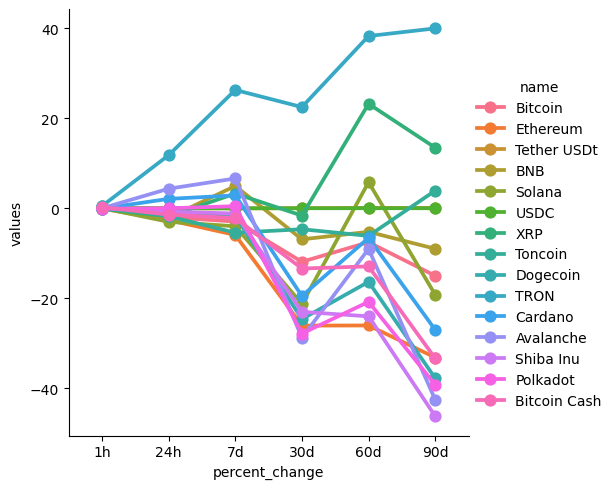

In [54]:
sns.catplot(x='percent_change', y='values', data = df7, hue='name', kind='point')

In [56]:
df10 = df[['name','quote.USD.price','timestamp']]
df10 = df10.query("name == 'Bitcoin'")
df10

,name,quote.USD.price,timestamp
0,Bitcoin,59225.88177,2024-08-21 12:48:18.660208
15,Bitcoin,59223.98806,2024-08-21 12:49:19.295082
30,Bitcoin,59374.57708,2024-08-21 14:30:39.350925
45,Bitcoin,59374.57708,2024-08-21 14:31:40.030236
60,Bitcoin,59364.12519,2024-08-21 14:32:40.609204
75,Bitcoin,59433.57922,2024-08-21 14:41:33.007290
90,Bitcoin,59433.57922,2024-08-21 14:41:38.726014
105,Bitcoin,59433.57922,2024-08-21 14:41:44.487607
120,Bitcoin,59433.57922,2024-08-21 14:41:50.429715
135,Bitcoin,59433.57922,2024-08-21 14:41:56.057666


<Axes: xlabel='timestamp', ylabel='quote.USD.price'>

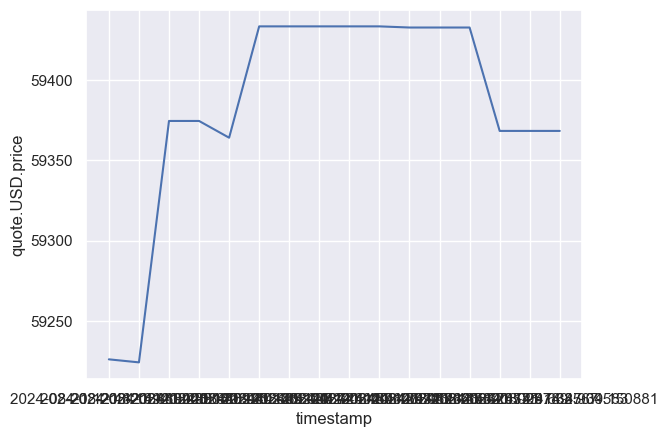

In [58]:
sns.set_theme(style="darkgrid")

sns.lineplot(x='timestamp', y='quote.USD.price', data = df10)